In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Wir werden unser daten_squad_merge-Dataset erneut untersuchen und nach neuen Features suchen, um unser Modell weiter zu verbessern.**

In [89]:
daten_squad_merge = pd.read_csv("daten_squad_merge.csv")
daten_squad_merge.head()

,name,positions,age,height,weight,nationality,team,year,team_placement
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


### Feature Engineer

**1. Zielvariablen in Gruppen einteilen**

1. Es gibt zu viele Zielvariablen für die geringe Anzahl an Datenpunkten. Der Median und die Verteilung der Features Alter, Größe und Gewicht in Bezug auf die Zielvariablen sind sehr ähnlich, wie in den Boxplot-Diagrammen zu erkennen ist. Die Daten unterscheiden sich nicht signifikant in den verschiedenen Klassen, was zukünftige Modelle erschweren könnte.


2. Wenn wir 100.000 oder mehr Einträge im Datensatz hätten, wäre dieses Problem möglicherweise nicht vorhanden. Derzeit haben wir jedoch nur 254 Einträge im Datensatz, von denen fast 10 % nur in bestimmten Klassen vertreten sind.


3. Da wir 20 Platzierungen haben, könnte eine mögliche Lösung darin bestehen, die Zielvariable in Gruppen zu unterteilen. Die ersten 5 Mannschaften qualifizieren sich für die Champions League, während die letzten 3 Mannschaften in der Tabelle absteigen. Auf dieser Grundlage könnten wir unsere Klassifikationen gruppieren.


4. Wir werden die Zielvariablen in 3 Gruppen aufteilen: Platz 1-5 -> 0, Platz 6-17 -> 1, Platz 18-20 -> 2.

In [90]:
# Zielvariablen
daten_squad_merge.team_placement.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [91]:
## Teiln die Zielvariablen Gruppen, 1-5 ->0 , 6-17->1, 18-20 ->2 
daten_squad_merge['team_placement_2'] = pd.cut(daten_squad_merge.team_placement,
                                                     [1,5,17,20],include_lowest=True,labels=False)


In [92]:
# übersieht
daten_squad_merge.sample(10)

,name,positions,age,height,weight,nationality,team,year,team_placement,team_placement_2
4365,Branislav Ivanovic2,D,37.0,1.85,78.0,Sérvia,chelsea,2010,2,0
5692,Federico Macheda33,A,30.0,1.85,77.0,Itália,queens park rangers,2011,17,1
6621,Gylfi Sigurdsson22,M,32.0,1.85,78.0,Islândia,tottenham hotspur,2013,6,1
8430,Ovie Ejaria53,M,23.0,1.83,73.0,Inglaterra,liverpool,2016,4,0
1086,Geoff Horsfield9,A,48.0,1.83,79.0,Inglaterra,west bromwich albion,2004,17,1
7504,Brown Ideye9,A,33.0,1.80,78.0,Nigéria,west bromwich albion,2014,13,1
8563,Jay Rodriguez9,A,32.0,1.85,83.0,Inglaterra,southampton,2016,8,1
8736,Michael Phillips45,M,24.0,NaN,NaN,Inglaterra,crystal palace,2016,14,1
11090,Seamus Coleman23,D,33.0,1.78,67.0,Irlanda,everton,2020,10,1
10783,Emiliano Buendía17,M,24.0,1.73,72.0,Argentina,norwich city,2019,20,2


Zur Kontrolle überprüfen wir nun genauer, wie die Platzierungen aktuell verteilt sind.


**Die ersten 5 Mannschaften qualifizieren sich für die Champions League**

**die letzten 3 Mannschaften werden in der Tabelle absteigen.**

In [93]:
## ob die neu Variable richtig ist
daten_squad_merge.groupby(['team_placement','team_placement_2']).year.count()

team_placement  team_placement_2
1               0                   626
2               0                   641
3               0                   666
4               0                   677
5               0                   622
6               1                   576
7               1                   599
8               1                   611
9               1                   584
10              1                   567
11              1                   614
12              1                   615
13              1                   565
14              1                   572
15              1                   612
16              1                   584
17              1                   570
18              2                   586
19              2                   566
20              2                   594
Name: year, dtype: int64

**2.Nationality**

**Neu Spalte Ausländische Spieler**

1. Fallstudien: 
Einige der erfolgreichsten Mannschaften der Premier League, wie Manchester City und Chelsea, haben stark auf ausländische Talente gesetzt und damit große Erfolge erzielt, sowohl auf nationaler als auch auf internationaler Ebene.


2. Talent und Qualität:
Höhere Qualität: Ausländische Spieler bringen oft ein höheres Talent- und Erfahrungsniveau mit, da sie aus verschiedenen Fußballkulturen und -systemen kommen. Diese Vielfalt kann eine Mannschaft auf ein höheres Spielniveau heben.
Internationale Stars: Die Verpflichtung international bekannter Spieler kann eine Mannschaft erheblich verstärken und sie wettbewerbsfähiger machen, besonders in den oberen Rängen der Liga.


3. Strategische Vielfalt:
Taktische Flexibilität: Ausländische Spieler können unterschiedliche Spielstile und Taktiken mitbringen, was der Mannschaft erlaubt, flexibler auf verschiedene Gegner zu reagieren.
Erweiterte Spielkultur: Durch die Integration ausländischer Spieler können Mannschaften ihre Spielkultur bereichern und innovative Ansätze entwickeln, die sonst in der heimischen Liga nicht üblich sind.


4. Eine neu Feature **Nationality** wird in der Datenset für das Modell eingefügt. **Das Feld hat den Werte zwische 0 und 1**

In [94]:
# FLAG ob der Spieler Engländer ist oder nicht bereich
# Die Zielvarible(Klassifikation) hat jetzt staat 20 Plätz nur 3 Plätze.
daten_squad_merge.loc[:,'auslaender'] = daten_squad_merge.nationality.apply(lambda x: 1 if x != 'Inglaterra' else 0 ) 
daten_squad_merge.head()

,name,positions,age,height,weight,nationality,team,year,team_placement,team_placement_2,auslaender
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0,0


- Gruppierung des Medians für die Features Alter, Größe und Gewicht nach den Spalten Jahr und Klassifikation (team_placement_2).

In [95]:
## Median von den neuen Spalten mit der neue Variable team_placement_2 
median_klassifikation_team = daten_squad_merge.groupby(['year','team_placement_2']).agg({'height':'mean','weight':'mean','age':'mean'}).reset_index()
median_klassifikation_team.head()


,year,team_placement_2,height,weight,age
0,2003,0,1.818743,76.018072,40.976190
1,2003,1,1.821686,77.077151,42.373178
2,2003,2,1.812329,76.712329,42.301370
3,2004,0,1.828354,77.558282,40.067485
4,2004,1,1.822275,77.241791,41.632836


**3. Berechnung der Spieleranzahl pro Jahr und Tabellenposition**

1. Für jedes Jahr werden wir die Anzahl der Spieler pro Mannschaft berechnen und die Mannschaften basierend auf ihrer Klassifizierung in der Liga gruppieren.

2. Im Jahr 2003 betrug die Gesamtanzahl der Spieler folgendermaßen:

- Die Mannschaften, die die ersten fünf Plätze belegten, hatten insgesamt 168 Spieler.
- Die Mannschaften, die die Plätze 6 bis 17 belegten, hatten insgesamt 343 Spieler.
- Die Mannschaften, die die Plätze 18 bis 20 belegten, hatten insgesamt 73 Spieler.

In [96]:
## Spielersumme pro Positionen in der Tabelle
qtd_spieler_position = daten_squad_merge.groupby(['year','team_placement_2']).name.count().reset_index().rename(columns={'name':'summe_spieler'})
qtd_spieler_position.head()

,year,team_placement_2,summe_spieler
0,2003,0,168
1,2003,1,343
2,2003,2,73
3,2004,0,166
4,2004,1,340


5. Anzahl der Mannschfaten  pro Positionen in der Tabelle

In [97]:
# Anzahl der Mannschfaten  pro Positionen in der Tabelle
qtd_spieler_position = (daten_squad_merge.groupby(['year','team_placement_2'])
                          .agg({'name':"count", 'team':'nunique'})
                          .reset_index().rename(columns={'name':'spieleranzahl'}))

qtd_spieler_position.head()

,year,team_placement_2,spieleranzahl,team
0,2003,0,168,5
1,2003,1,343,12
2,2003,2,73,3
3,2004,0,166,5
4,2004,1,340,12


**4. Durchschnittliche Spieleranzahl pro Mannschaft in Abhängigkeit von der Rangposition:**

Da wir aktuell mit Medianwerten arbeiten, werden wir die Spalte spieler_median ebenfalls in Mediane umwandeln. Dazu berechnen wir die Anzahl der Spieler pro Mannschaft in der Spalte team_placement_2 nach Jahr.

In [98]:
## EXECUTAR NO OUTRO MOMENTO 
##  Median der Spieler in jeder Positionen in der Tabelle und Saison
qtd_spieler_position.loc[:,'spieler_median'] = qtd_spieler_position.spieleranzahl / qtd_spieler_position.team
qtd_spieler_position.head()

,year,team_placement_2,spieleranzahl,team,spieler_median
0,2003,0,168,5,33.600000
1,2003,1,343,12,28.583333
2,2003,2,73,3,24.333333
3,2004,0,166,5,33.200000
4,2004,1,340,12,28.333333


**5. Prozentsatz ausländischer Spieler pro Tabellenposition und Jahr**

Im Jahr 2003 waren 63 % der Spieler in den Top 5 Mannschaften Ausländer, während 36 % der Spieler Einheimische waren. Bei den Abstiegsmannschaften waren 47 % der Spieler Ausländer und 52 % Einheimische.

In [99]:
# Prozentsatz von Auslädichen Spieler pro Position in der Tabelle und Jahr
# die ersten 5 teams in 2003 63.095238 % sind Äuslander
# Grupierung nach Year Klassifikation von Auslädichen Spieler

perct_auslaender = daten_squad_merge.groupby(['year','team_placement_2']).auslaender.value_counts(normalize=True)*100

In [100]:
#darstellung
perct_auslaender = pd.DataFrame(perct_auslaender)
perct_auslaender .head(6)

auslaender
year team_placement_2 auslaender            
2003 0                1            63.095238
                      0            36.904762
     1                1            54.810496
                      0            45.189504
     2                0            52.054795
                      1            47.945205

Rename Spalte Ausländer

In [101]:
## rename von der Spalte
perct_auslaender = perct_auslaender.rename(columns={'auslaender':'auslaender_prozent'} )
perct_auslaender.head(6)

auslaender_prozent
year team_placement_2 auslaender                    
2003 0                1                    63.095238
                      0                    36.904762
     1                1                    54.810496
                      0                    45.189504
     2                0                    52.054795
                      1                    47.945205

Umwandlung eines MultiIndex in eine einzelne Spalte.

In [102]:
## index werden zum Spalten 
perct_auslaender = perct_auslaender.reset_index()
perct_auslaender.head()

,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1,63.095238
1,2003,0,0,36.904762
2,2003,1,1,54.810496
3,2003,1,0,45.189504
4,2003,2,0,52.054795


- Filterung der Tabelle nach ausschließlich ausländischen Spielern. Diese Information ist in diesem Fall wichtig, um zu analysieren, ob der prozentuale Anteil an ausländischen Spielern in den Mannschaften einen Einfluss auf den Erfolg der Teams hat.

In [103]:
## Filter die Tabelle nach nur die Ausländer
perct_auslaender = perct_auslaender.query("auslaender == 1")
perct_auslaender.head()

,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1,63.095238
2,2003,1,1,54.810496
5,2003,2,1,47.945205
6,2004,0,1,65.662651
8,2004,1,1,56.176471


- Zusammenführen der DataFrames.

In [104]:
# Zusammenfügen
median_klassifikation_team = pd.concat([median_klassifikation_team,qtd_spieler_position,perct_auslaender],axis=1,join='inner')
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,year,team_placement_2,spieleranzahl,team,spieler_median,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,2003,0,168,5,33.600000,2003,0,1,63.095238
2,2003,2,1.812329,76.712329,42.301370,2003,2,73,3,24.333333,2003,1,1,54.810496
5,2004,2,1.820952,76.904762,41.602410,2004,2,84,3,28.000000,2003,2,1,47.945205
6,2005,0,1.827250,76.925000,39.031250,2005,0,160,5,32.000000,2004,0,1,65.662651
8,2005,2,1.824366,77.070423,39.295775,2005,2,71,3,23.666667,2004,1,1,56.176471


- Löschen Doppelt Spalten

In [105]:
## Löschen Doppelt Spalten
median_klassifikation_team = median_klassifikation_team.loc[:,~median_klassifikation_team.columns.duplicated()]
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,spieleranzahl,team,spieler_median,auslaender,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,168,5,33.600000,1,63.095238
2,2003,2,1.812329,76.712329,42.301370,73,3,24.333333,1,54.810496
5,2004,2,1.820952,76.904762,41.602410,84,3,28.000000,1,47.945205
6,2005,0,1.827250,76.925000,39.031250,160,5,32.000000,1,65.662651
8,2005,2,1.824366,77.070423,39.295775,71,3,23.666667,1,56.176471


- Löschen von nicht benötigten Spalten 'auslaender' und 'team'

In [106]:
# Löschen von Spalten die nicht gebrauch werden.
median_klassifikation_team = median_klassifikation_team.drop(columns=['auslaender','team'])

# median_klassifikation_team =median_klassifikation_team.drop(columns=['auslaender','qtd_jogadores','taem'])
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,spieleranzahl,spieler_median,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,168,33.600000,63.095238
2,2003,2,1.812329,76.712329,42.301370,73,24.333333,54.810496
5,2004,2,1.820952,76.904762,41.602410,84,28.000000,47.945205
6,2005,0,1.827250,76.925000,39.031250,160,32.000000,65.662651
8,2005,2,1.824366,77.070423,39.295775,71,23.666667,56.176471


- Datei  Speichern

In [107]:
## datei  Speichern
median_klassifikation_team.to_csv("median_klassifikation_team_v2.csv",index=False)

### 2. Explorativ Datenanalyse



In [108]:
# null Wert durchsuchen
(median_klassifikation_team.isna().sum()/len(median_klassifikation_team)*100).sort_values(ascending=False)

year                  0.0
team_placement_2      0.0
height                0.0
weight                0.0
age                   0.0
spieleranzahl         0.0
spieler_median        0.0
auslaender_prozent    0.0
dtype: float64

- Die Daten liegen in verschiedenen Skalen vor und müssen in einzelnen Boxplots dargestellt werden.



- Wahrscheinlich müssen die Daten erneut normalisiert werden.

<AxesSubplot:>

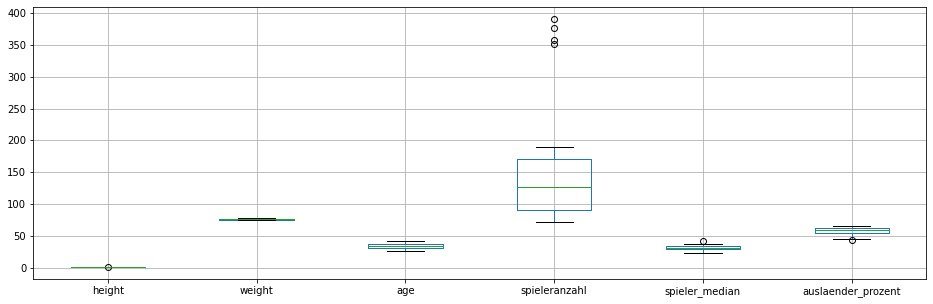

In [109]:
median_klassifikation_team.drop(columns=['team_placement_2','year']).boxplot(figsize=(16,5))

**2.1 Boxplot**

**Die Mediane der meisten unabhängigen Variablen zeigen eine deutliche Variation in Bezug auf die Zielvariable. Für ein Klassifikationsmodell ist das ein positives Zeichen.**

- Die Variable Alter zeigt eine Variation des Medians.


- Besonders die Variable auslaender_prozent zeigt eine Medianvariation von 64%, 55% und 57%. Die Verteilung deutet darauf hin, dass je höher der Anteil ausländischer Spieler, desto besser die Klassifikation einer Mannschaft ist. Dies deutet auf eine negative Korrelation hin.


- Auch der Median der Anzahl der Spieler variiert je nach Klassifikation.


- Die Verteilung der Werte (Interquartilsabstand) der Körpergröße unterscheidet sich ebenfalls je nach Klassifikation.


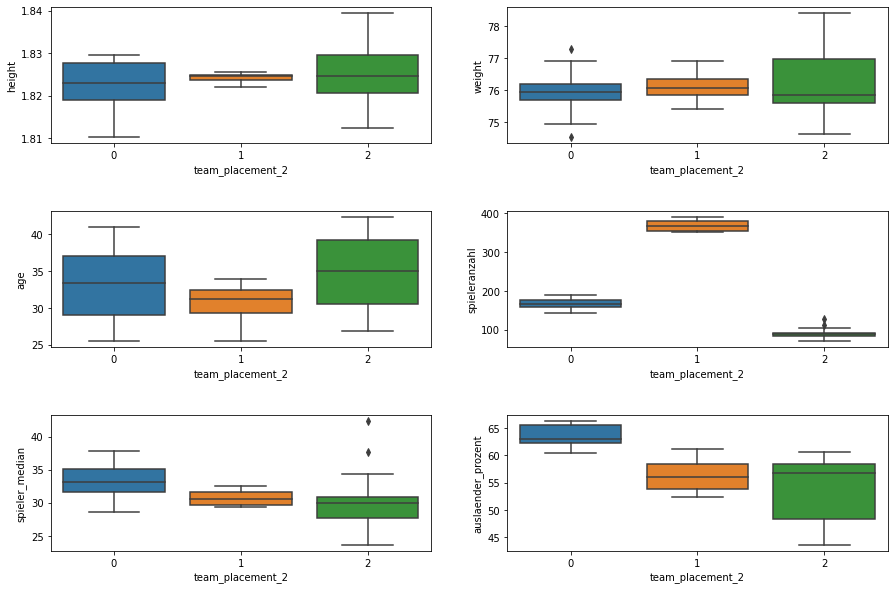

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=.5, wspace=0.2)
i = 1
for j,c in enumerate(median_klassifikation_team.columns): #['VL_FLX_VNCT','VL_VNCT','VL_FATM','IN_TRNS_TITD']):
  if c not in ['team_placement_2','year','team']:
      ax = fig.add_subplot(3, 2, i)
      sns.boxplot(x='team_placement_2',y=c,data=median_klassifikation_team)
      i += 1

**2.2 Histogramm**

- Körpergröße ist normal verteilt.


- Wir haben viele Spieler, die zwischen 26 und 27 Jahre alt sind.


- Es gibt viele Ausreißer bei der Anzahl der Spieler.


- Ab einem Anteil von 40 % beginnt der Anteil der ausländischen Spieler merklich zuzunehmen.

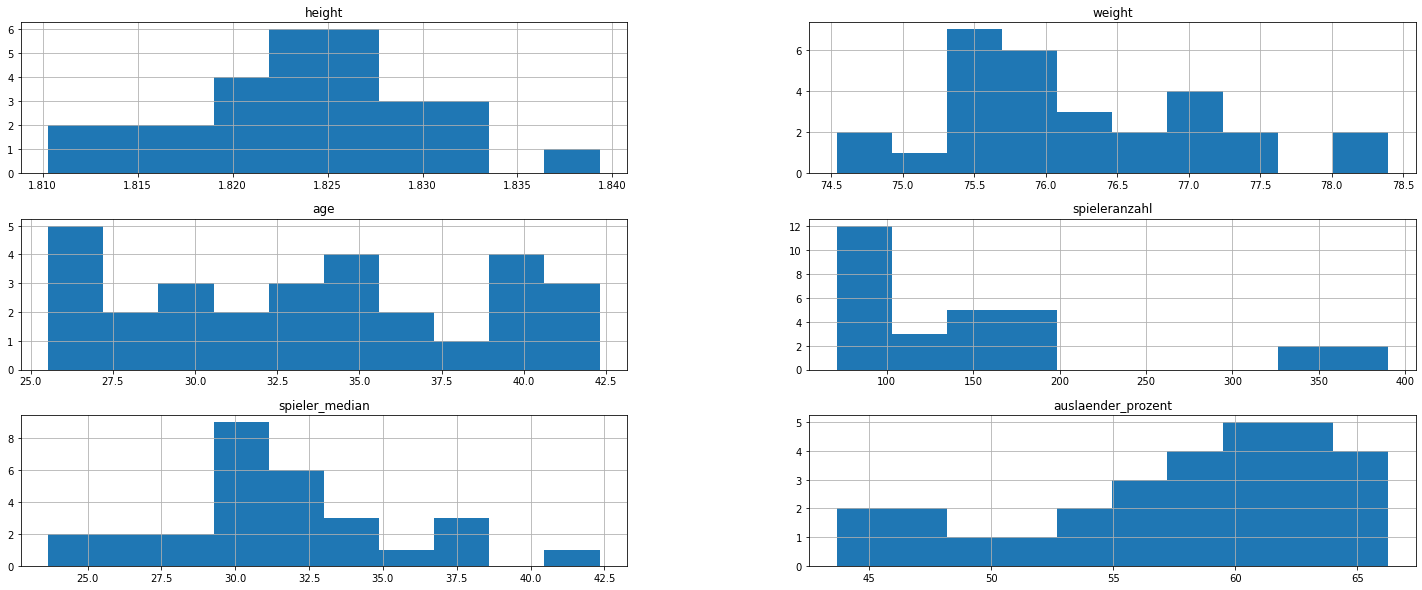

In [111]:
median_klassifikation_team.drop(columns=['year','team_placement_2']).hist(figsize=(25,10))
plt.show()

**2.3 Pairplot**

- Die Grafik, die den Prozentsatz der ausländischen Spieler gegen die Platzierung in der Liga (team_placement_2) darstellt, bestätigt die Tendenz, dass Mannschaften mit einem höheren Anteil an ausländischen Spielern in der Regel besser in der Liga abschneiden.

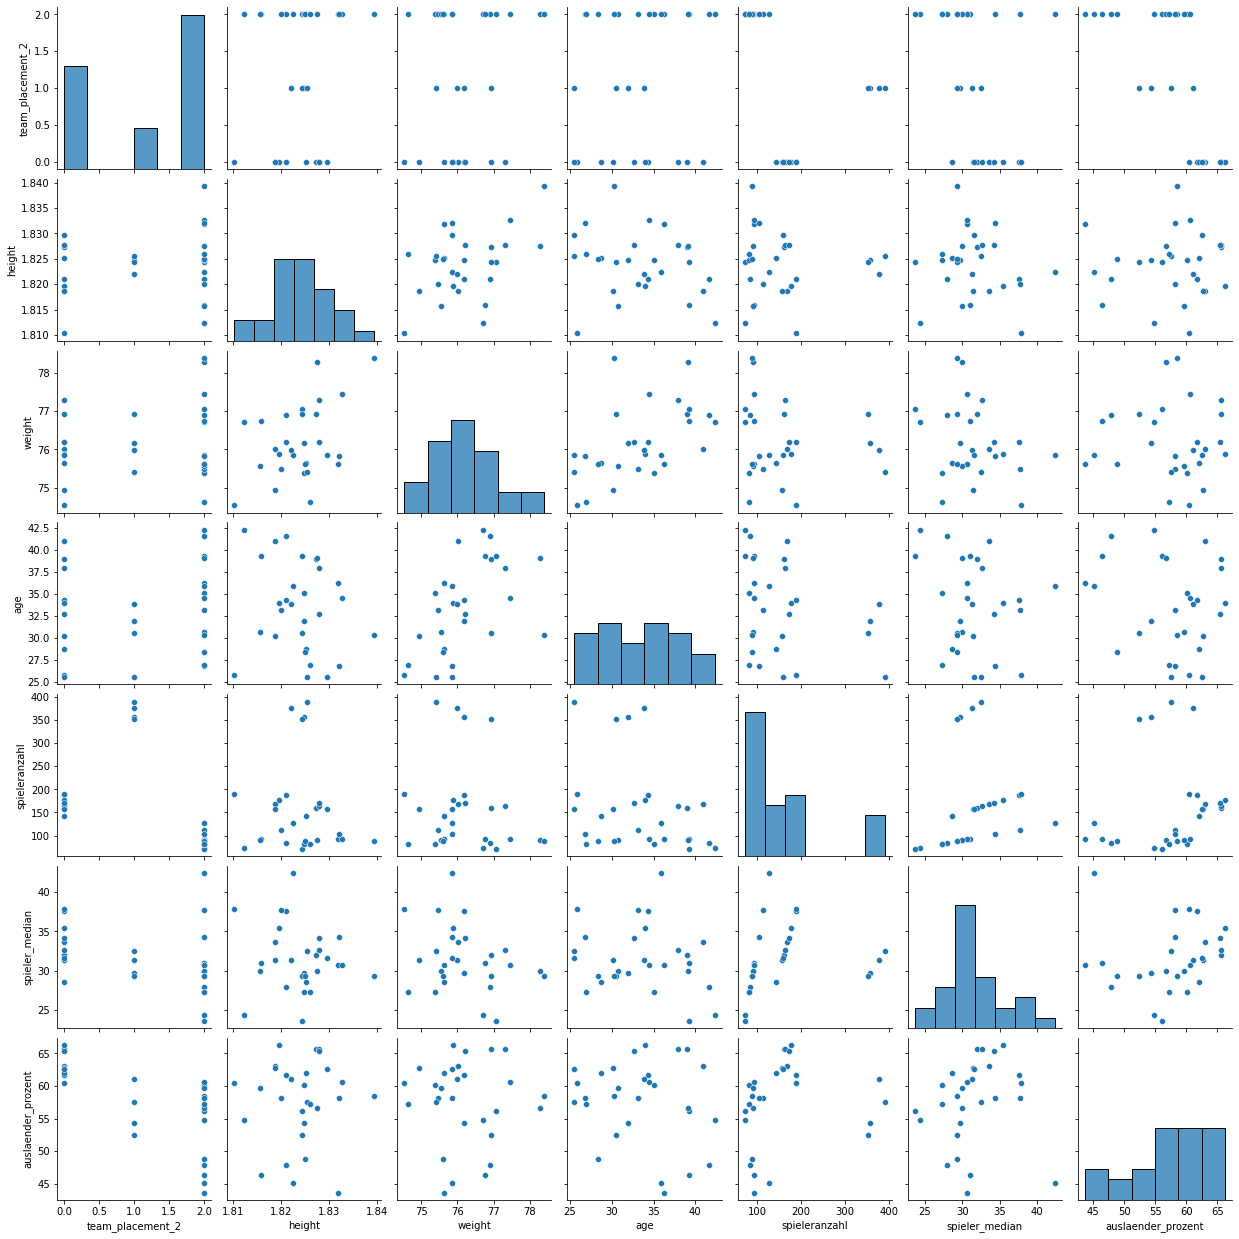

In [112]:
## Grafik zwischen die Features
sns.pairplot(median_klassifikation_team.drop(columns=['year']) )
#pd.plotting.scatter_matrix(media_classificacao_time.drop(columns=['ano']), figsize=(20,15))
plt.show()

**2.4 Pairplot**

- Die Grafik zeigt, dass die Spieleranzahl in drei Gruppen unterteilt ist, abhängig von der Platzierung in der Tabelle. Das _ -- Alter der ausländischen Spieler liegt überwiegend zwischen 25 und 40 Jahren, wobei die Variable age keinen signifikanten Einfluss auf die Platzierung der Mannschaft hat. 


- Die Anzahl der Spieler variiert jedoch deutlich, was positiv für zukünftige Modelle ist, da die Klassen offensichtlich gut getrennt sind.

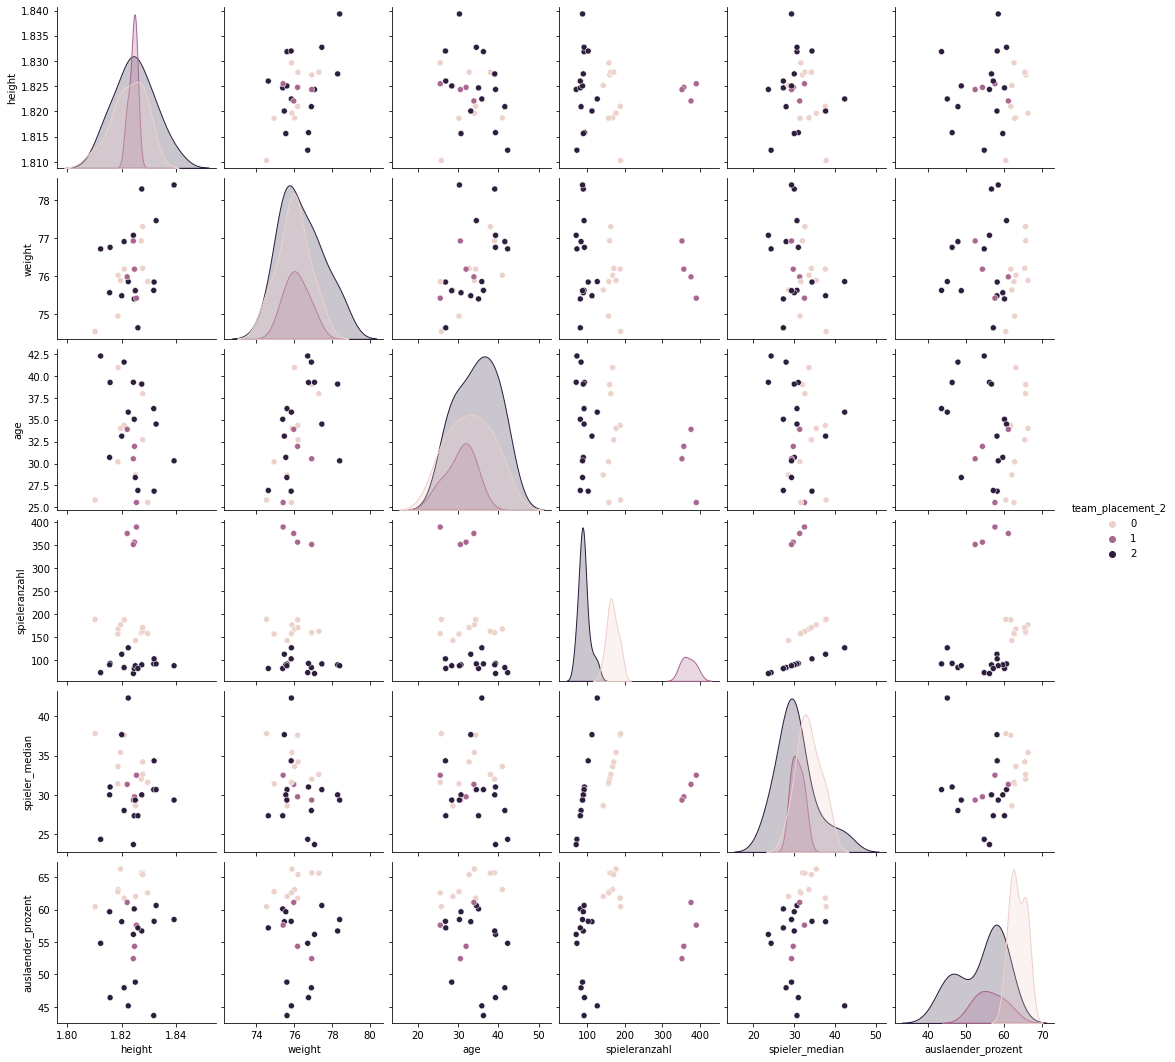

In [113]:
## Grafik zwischen die Features
sns.pairplot(median_klassifikation_team.drop(columns=['year']),hue='team_placement_2' )
#pd.plotting.scatter_matrix(media_classificacao_time.drop(columns=['ano']), figsize=(20,15))
plt.show()

**2.5 Heatmap**

- Es zeigt sich eine starke negative Korrelation zwischen team_placement_2 und der spieleranzahl. Das bedeutet, je schlechter die Platzierung in der Tabelle (Richtung Platz 20), desto geringer ist die Spieleranzahl.


- Ebenso gibt es eine starke negative Korrelation zwischen team_placement_2 und dem auslaender_prozent. Das bedeutet, dass Mannschaften mit einer schlechteren Platzierung (Richtung Platz 20) tendenziell einen geringeren Anteil an ausländischen Spielern haben.


- Wichtig zu beachten ist, dass die Platzierung in der Tabelle von 1 bis 20 reicht, wobei die besten Plätze die ersten 5 sind.




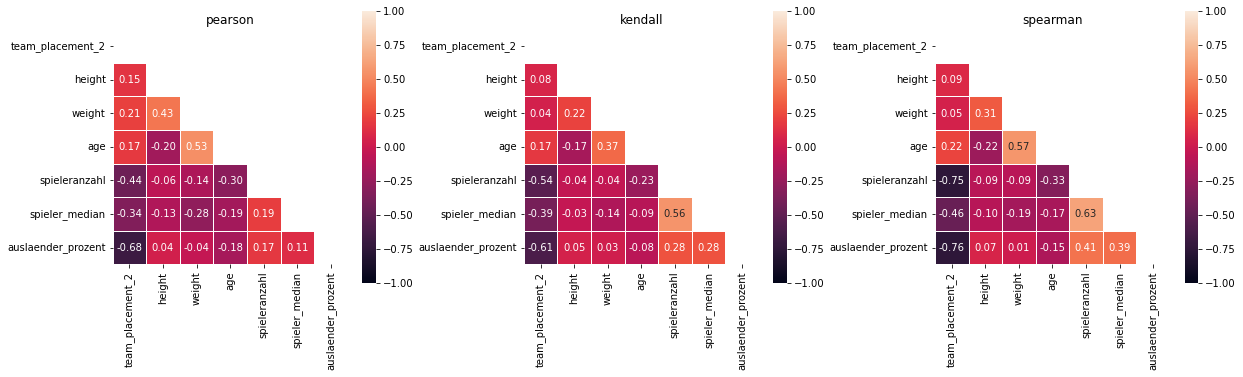

In [114]:
## GRÁFICO PARA ANALISAR OS COEFICIENTES DE CORRELAÇÃO ENTRE AS VARIÁVEIS
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.4)

corr     = median_klassifikation_team.drop(columns=['year']).corr()
kendall  = median_klassifikation_team.drop(columns=['year']).corr('kendall')
spearman = median_klassifikation_team.drop(columns=['year']).corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()